In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [31]:
data.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [32]:
data

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,0.0,15.101802
9700,180,0.0,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [33]:
data.isna().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [34]:
## Fill missings with 0
data = data.fillna(0)

In [35]:
data.isna().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
y_train = df_train['fuel_efficiency_mpg'].astype('float').values
y_val = df_val['fuel_efficiency_mpg'].astype('float').values
y_test = df_test['fuel_efficiency_mpg'].astype('float').values

In [39]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [40]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text

In [41]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [42]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [43]:
test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

1

In [44]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [46]:
X_train[0],y_train[0]

(array([ 1.3900000e+01,  0.0000000e+00,  1.0000000e+00,  1.2000000e+02,
         0.0000000e+00,  1.0000000e+00,  1.6900000e+02,  2.0050000e+03,
         5.0000000e+00, -1.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         1.0000000e+00,  2.9666795e+03]),
 np.float64(15.301475401402772))

In [47]:
y_pred = regressor.predict(X_val)
y_pred

array([16.88218854, 16.88218854, 16.88218854, ..., 12.9383797 ,
       12.9383797 , 16.88218854])

In [48]:
print(export_text(regressor, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [49]:
print(len(dv.get_feature_names_out()))
print(dv.get_feature_names_out())

14
['acceleration' 'drivetrain=All-wheel drive'
 'drivetrain=Front-wheel drive' 'engine_displacement' 'fuel_type=Diesel'
 'fuel_type=Gasoline' 'horsepower' 'model_year' 'num_cylinders'
 'num_doors' 'origin=Asia' 'origin=Europe' 'origin=USA' 'vehicle_weight']


In [50]:
len(regressor.feature_importances_)

14

In [51]:
len(df_train.columns)

10

In [52]:
regressor.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

2

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=10, random_state=1)

In [54]:
rfr.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
y_pred_rfr = rfr.predict(X_val)

In [56]:
from sklearn.metrics import root_mean_squared_error

In [59]:
rmse1 = root_mean_squared_error(y_val, y_pred_rfr)
rmse1

0.4599777557336148

In [58]:
len(y_val)

1941

In [61]:
n_est = np.array(list(range(10, 201, 10)))
n_est

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])

In [63]:
import matplotlib.pyplot as plt

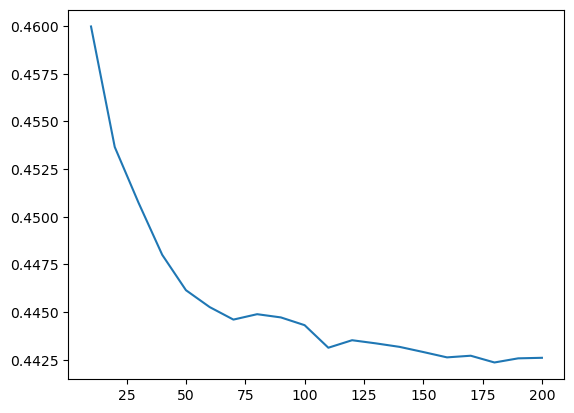

In [65]:
rmse_results =[]
for est in n_est:
    rfr_1 = RandomForestRegressor(n_estimators=est, random_state=1) 
    rfr_1.fit(X_train, y_train)
    y_pred_rfr_1 = rfr_1.predict(X_val)
    rmse1_1 = root_mean_squared_error(y_val, y_pred_rfr_1)
    rmse_results.append(rmse1_1)

plt.plot(n_est, rmse_results)

4

In [72]:
max_depths = [10, 15, 20, 25]
results = {
    "max_depth": [],
    "n_estimators": [],
    "rmse": []
}
for md in max_depths:
    for est in n_est:
        rfr2 = RandomForestRegressor(n_estimators=est, random_state=1,max_depth=md)
        rfr2.fit(X_train, y_train)
        y_pred_rfr2 = rfr2.predict(X_val)
        rmse1_2 = root_mean_squared_error(y_val, y_pred_rfr2)
        results["max_depth"].append(md)
        results["n_estimators"].append(est)
        results["rmse"].append(rmse1_2)
        print(f"max_depth: {md} | n_estimators: {est} ==> rmse1_1: {rmse1_2}")
    

max_depth: 10 | n_estimators: 10 ==> rmse1_1: 0.45189498205368783
max_depth: 10 | n_estimators: 20 ==> rmse1_1: 0.44871930280196803
max_depth: 10 | n_estimators: 30 ==> rmse1_1: 0.4462248243410706
max_depth: 10 | n_estimators: 40 ==> rmse1_1: 0.4438769469346297
max_depth: 10 | n_estimators: 50 ==> rmse1_1: 0.4426823297364458
max_depth: 10 | n_estimators: 60 ==> rmse1_1: 0.44234995527764454
max_depth: 10 | n_estimators: 70 ==> rmse1_1: 0.4417931394907604
max_depth: 10 | n_estimators: 80 ==> rmse1_1: 0.44195965762740047
max_depth: 10 | n_estimators: 90 ==> rmse1_1: 0.44196681006003036
max_depth: 10 | n_estimators: 100 ==> rmse1_1: 0.44177674543409867
max_depth: 10 | n_estimators: 110 ==> rmse1_1: 0.4408469921594633
max_depth: 10 | n_estimators: 120 ==> rmse1_1: 0.44096669954703027
max_depth: 10 | n_estimators: 130 ==> rmse1_1: 0.4408325522436666
max_depth: 10 | n_estimators: 140 ==> rmse1_1: 0.4405115320481308
max_depth: 10 | n_estimators: 150 ==> rmse1_1: 0.440127581955975
max_depth: 10

In [74]:
# Display the top 10 results
result_df = pd.DataFrame(results).sort_values(by=["max_depth", "n_estimators"]).head(10)

<Axes: xlabel='n_estimators', ylabel='rmse'>

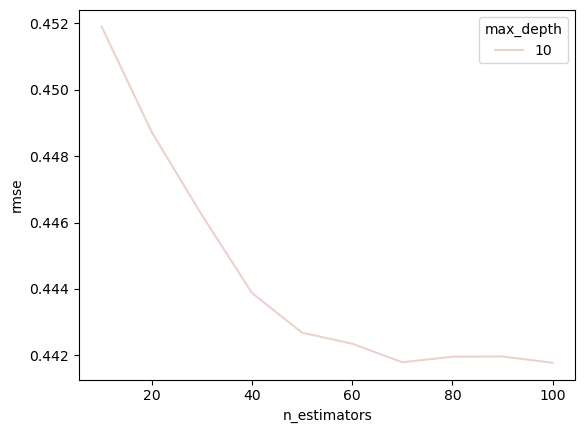

In [75]:
import seaborn as sns
sns.lineplot(data=result_df, x="n_estimators", y="rmse", hue="max_depth")

In [76]:
result_df

,max_depth,n_estimators,rmse
0,10,10,0.451895
1,10,20,0.448719
2,10,30,0.446225
3,10,40,0.443877
4,10,50,0.442682
5,10,60,0.442350
6,10,70,0.441793
7,10,80,0.441960
8,10,90,0.441967
9,10,100,0.441777


5

In [77]:
rfr3 = RandomForestRegressor(max_depth=20, n_estimators=20, random_state=1)
rfr3.fit(X_train, y_train)
y_pred_rfr3 = rfr3.predict(X_val)

In [80]:
rfr3.feature_importances_

array([1.15602261e-02, 3.45479234e-04, 2.96826402e-04, 3.29772243e-03,
       3.37475005e-04, 3.33104544e-04, 1.59568438e-02, 3.24497955e-03,
       2.35053738e-03, 1.57861884e-03, 4.71269672e-04, 4.97503290e-04,
       5.68908668e-04, 9.59160505e-01])

In [81]:
rfr3.fe

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors'],
      dtype='object')

In [84]:
rfr3.feature_importances_

array([1.15602261e-02, 3.45479234e-04, 2.96826402e-04, 3.29772243e-03,
       3.37475005e-04, 3.33104544e-04, 1.59568438e-02, 3.24497955e-03,
       2.35053738e-03, 1.57861884e-03, 4.71269672e-04, 4.97503290e-04,
       5.68908668e-04, 9.59160505e-01])

In [86]:
dv.get_feature_names_out()

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

6

In [88]:
import xgboost as xgb
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [90]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [91]:
y_pred = model.predict(dval)
y_pred

array([18.594637, 15.30577 , 18.11612 , ..., 14.611466, 13.669743,
       15.625642], dtype=float32)